# Asthama Disease Prediction using Machine Learning

## Problem Statement :
-Overall, the goal is to develop an accurate and interpretable model that can assist in assessing
the severity of asthma in individuals, with the potential to improve medical decision-making and 
patient care.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import plotly.graph_objects as go 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("asthama.csv")

In [5]:
df.head()

Tiredness  Dry-Cough  Difficulty-in-Breathing  Sore-Throat  None_Sympton  \
0          1          1                        1            1             0   
1          1          1                        1            1             0   
2          1          1                        1            1             0   
3          1          1                        1            1             0   
4          1          1                        1            1             0   

   Pains  Nasal-Congestion  Runny-Nose  None_Experiencing  Age_0-9  Age_10-19  \
0      1                 1           1                  0        1          0   
1      1                 1           1                  0        1          0   
2      1                 1           1                  0        1          0   
3      1                 1           1                  0        1          0   
4      1                 1           1                  0        1          0   

   Age_20-24  Age_25-59  Age_60+  Gender_Female  Gender_Male  Severity_Mild  \
0          0          0        0              0            1              1   
1          0          0        0              0            1              1   
2          0          0        0              0            1              1   
3          0          0        0              0            1              0   
4          0          0        0              0            1              0   

   Severity_Moderate  Severity_None  
0                  0              0  
1                  0              0  
2                  0              0  
3                  1              0  
4                  1              0

In [6]:
df.tail()

Tiredness  Dry-Cough  Difficulty-in-Breathing  Sore-Throat  \
316795          0          0                        0            0   
316796          0          0                        0            0   
316797          0          0                        0            0   
316798          0          0                        0            0   
316799          0          0                        0            0   

        None_Sympton  Pains  Nasal-Congestion  Runny-Nose  None_Experiencing  \
316795             1      0                 0           0                  1   
316796             1      0                 0           0                  1   
316797             1      0                 0           0                  1   
316798             1      0                 0           0                  1   
316799             1      0                 0           0                  1   

        Age_0-9  Age_10-19  Age_20-24  Age_25-59  Age_60+  Gender_Female  \
316795        0          0          0          0        1              0   
316796        0          0          0          0        1              0   
316797        0          0          0          0        1              0   
316798        0          0          0          0        1              0   
316799        0          0          0          0        1              0   

        Gender_Male  Severity_Mild  Severity_Moderate  Severity_None  
316795            0              0                  0              0  
316796            0              0                  0              0  
316797            0              0                  0              1  
316798            0              0                  0              1  
316799            0              0                  0              1

In [9]:
df.shape

(316800, 19)

In [10]:
df.columns

Index(['Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing', 'Sore-Throat',
       'None_Sympton', 'Pains', 'Nasal-Congestion', 'Runny-Nose',
       'None_Experiencing', 'Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59',
       'Age_60+', 'Gender_Female', 'Gender_Male', 'Severity_Mild',
       'Severity_Moderate', 'Severity_None'],
      dtype='object')

In [11]:
df.duplicated().sum()

311040

In [12]:
df.isnull().sum()

Tiredness                  0
Dry-Cough                  0
Difficulty-in-Breathing    0
Sore-Throat                0
None_Sympton               0
Pains                      0
Nasal-Congestion           0
Runny-Nose                 0
None_Experiencing          0
Age_0-9                    0
Age_10-19                  0
Age_20-24                  0
Age_25-59                  0
Age_60+                    0
Gender_Female              0
Gender_Male                0
Severity_Mild              0
Severity_Moderate          0
Severity_None              0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   Tiredness                316800 non-null  int64
 1   Dry-Cough                316800 non-null  int64
 2   Difficulty-in-Breathing  316800 non-null  int64
 3   Sore-Throat              316800 non-null  int64
 4   None_Sympton             316800 non-null  int64
 5   Pains                    316800 non-null  int64
 6   Nasal-Congestion         316800 non-null  int64
 7   Runny-Nose               316800 non-null  int64
 8   None_Experiencing        316800 non-null  int64
 9   Age_0-9                  316800 non-null  int64
 10  Age_10-19                316800 non-null  int64
 11  Age_20-24                316800 non-null  int64
 12  Age_25-59                316800 non-null  int64
 13  Age_60+                  316800 non-null  int64
 14  Gender_Female            316800 non-

In [14]:
df.describe()

Tiredness      Dry-Cough  Difficulty-in-Breathing    Sore-Throat  \
count  316800.000000  316800.000000            316800.000000  316800.000000   
mean        0.500000       0.562500                 0.500000       0.312500   
std         0.500001       0.496079                 0.500001       0.463513   
min         0.000000       0.000000                 0.000000       0.000000   
25%         0.000000       0.000000                 0.000000       0.000000   
50%         0.500000       1.000000                 0.500000       0.000000   
75%         1.000000       1.000000                 1.000000       1.000000   
max         1.000000       1.000000                 1.000000       1.000000   

        None_Sympton          Pains  Nasal-Congestion     Runny-Nose  \
count  316800.000000  316800.000000     316800.000000  316800.000000   
mean        0.062500       0.363636          0.545455       0.545455   
std         0.242062       0.481046          0.497930       0.497930   
min         0.000000       0.000000          0.000000       0.000000   
25%         0.000000       0.000000          0.000000       0.000000   
50%         0.000000       0.000000          1.000000       1.000000   
75%         0.000000       1.000000          1.000000       1.000000   
max         1.000000       1.000000          1.000000       1.000000   

       None_Experiencing        Age_0-9      Age_10-19      Age_20-24  \
count      316800.000000  316800.000000  316800.000000  316800.000000   
mean            0.090909       0.200000       0.200000       0.200000   
std             0.287480       0.400001       0.400001       0.400001   
min             0.000000       0.000000       0.000000       0.000000   
25%             0.000000       0.000000       0.000000       0.000000   
50%             0.000000       0.000000       0.000000       0.000000   
75%             0.000000       0.000000       0.000000       0.000000   
max             1.000000       1.000000       1.000000       1.000000   

           Age_25-59        Age_60+  Gender_Female    Gender_Male  \
count  316800.000000  316800.000000  316800.000000  316800.000000   
mean        0.200000       0.200000       0.333333       0.333333   
std         0.400001       0.400001       0.471405       0.471405   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       1.000000       1.000000   
max         1.000000       1.000000       1.000000       1.000000   

       Severity_Mild  Severity_Moderate  Severity_None  
count  316800.000000      316800.000000  316800.000000  
mean        0.250000           0.250000       0.250000  
std         0.433013           0.433013       0.433013  
min         0.000000           0.000000       0.000000  
25%         0.000000           0.000000       0.000000  
50%         0.000000           0.000000       0.000000  
75%         0.250000           0.250000       0.250000  
max         1.000000           1.000000       1.000000

In [15]:
df.nunique()

Tiredness                  2
Dry-Cough                  2
Difficulty-in-Breathing    2
Sore-Throat                2
None_Sympton               2
Pains                      2
Nasal-Congestion           2
Runny-Nose                 2
None_Experiencing          2
Age_0-9                    2
Age_10-19                  2
Age_20-24                  2
Age_25-59                  2
Age_60+                    2
Gender_Female              2
Gender_Male                2
Severity_Mild              2
Severity_Moderate          2
Severity_None              2
dtype: int64

In [106]:
# for i in df.columns:
#     print('Countplot for:', i)
#     plt.figure(figsize=(15,6))
#     sns.countplot(x = df[i], data = df, palette = 'hls')
#     plt.show()
#     print('\n')

In [105]:
# for i in df.columns:
#     print('Pie plot for:', i)
#     plt.figure(figsize=(20, 10))
#     df[i].value_counts().plot(kind='pie', autopct='%1.1f%%')
#     plt.title('Distribution of ' + i)
#     plt.ylabel('')
#     plt.show()
#     print('\n')

In [104]:
# for i in df.columns:
#     fig = go.Figure(data=[go.Bar(x=df[i].value_counts().index, 
#                                  y=df[i].value_counts())])
#     fig.update_layout(
#         title=i,
#         xaxis_title=i,
#         yaxis_title="Count")
#     fig.show()

In [103]:
# for i in df.columns:
#     print('Pie plot for:', i)
#     fig = px.pie(df, names=i, title='Distribution of ' + i)
#     fig.show()
#     print('\n')

In [20]:
df = df.drop(['Severity_None'], axis = 1)

In [21]:
df['Asthma_Severity'] = df[['Severity_Mild', 'Severity_Moderate']].idxmax(axis=1)

In [22]:
severity_mapping = {
    'Severity_Mild': 'Mild',
    'Severity_Moderate': 'Moderate'
}

In [23]:
df['Asthma_Severity'] = df['Asthma_Severity'].map(severity_mapping)

In [24]:
df['Asthma_Severity']

0             Mild
1             Mild
2             Mild
3         Moderate
4         Moderate
            ...   
316795        Mild
316796        Mild
316797        Mild
316798        Mild
316799        Mild
Name: Asthma_Severity, Length: 316800, dtype: object

In [25]:
severity_mapping = {
    'Mild': 0,
    'Moderate': 1
}

In [26]:
df['Asthma_Severity'] = df['Asthma_Severity'].map(severity_mapping)

In [27]:
df['Asthma_Severity'].value_counts()

0    237600
1     79200
Name: Asthma_Severity, dtype: int64

Countplot for: Asthma_Severity


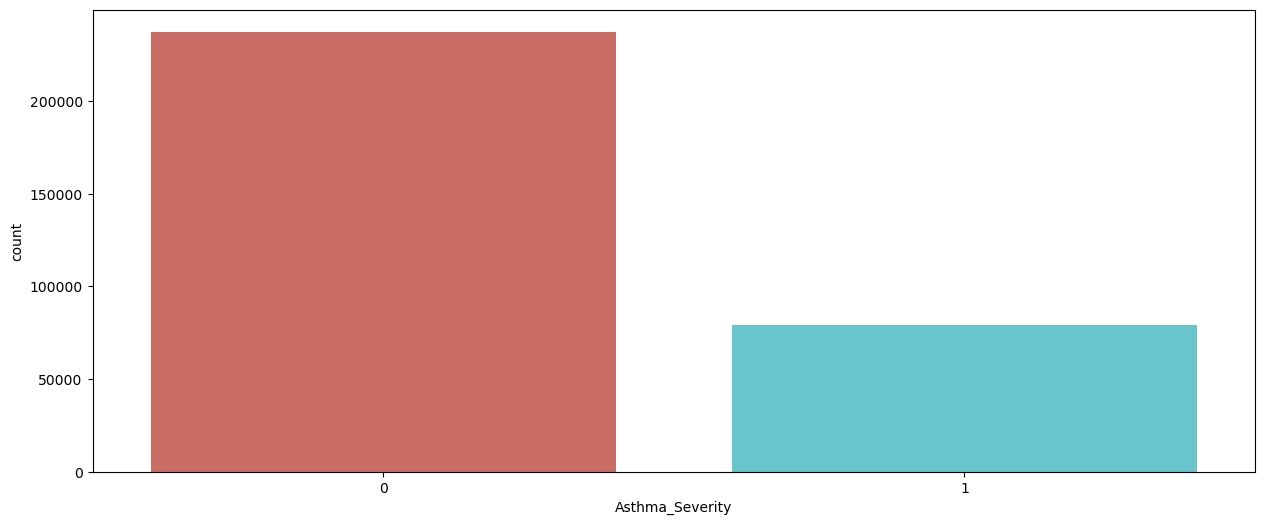

In [28]:
print('Countplot for:', 'Asthma_Severity')
plt.figure(figsize=(15,6))
sns.countplot(x = df['Asthma_Severity'], data = df, palette = 'hls')
plt.show()

Pie plot for: Asthma_Severity


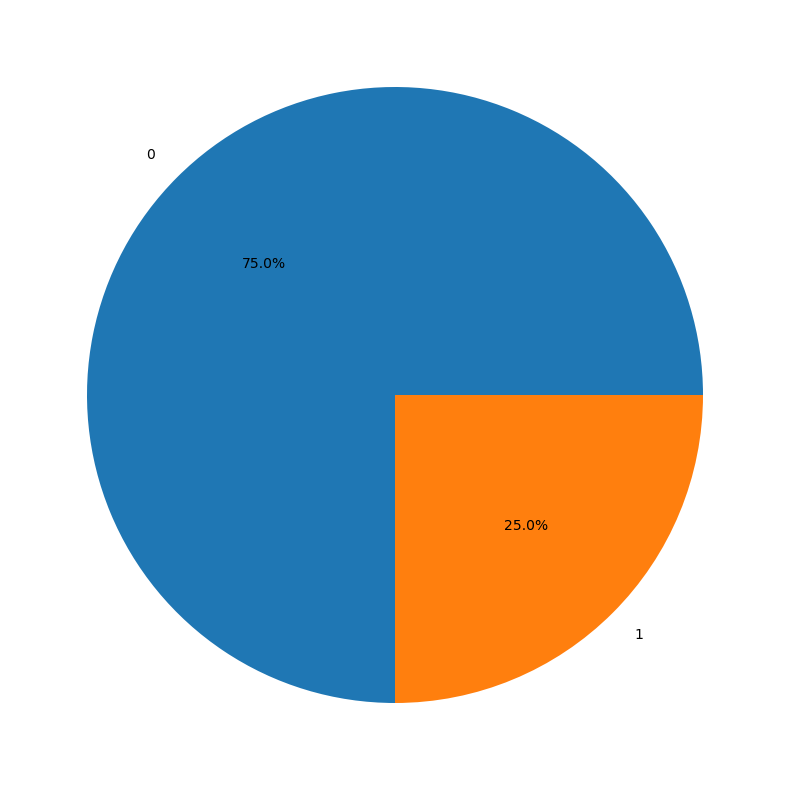

In [29]:
print('Pie plot for:', 'Asthma_Severity')
plt.figure(figsize=(20, 10))
df['Asthma_Severity'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.show()

In [30]:
fig = go.Figure(data=[go.Bar(x=df['Asthma_Severity'].value_counts().index, 
                                 y=df['Asthma_Severity'].value_counts())])
fig.update_layout(title='Asthma_Severity', xaxis_title='Asthma_Severity', 
                  yaxis_title="Count")
fig.show()

In [31]:
print('Pie plot for:', 'Asthma_Severity')
fig = px.pie(df, names='Asthma_Severity')
fig.show()

Pie plot for: Asthma_Severity


In [32]:
df.columns

Index(['Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing', 'Sore-Throat',
       'None_Sympton', 'Pains', 'Nasal-Congestion', 'Runny-Nose',
       'None_Experiencing', 'Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59',
       'Age_60+', 'Gender_Female', 'Gender_Male', 'Severity_Mild',
       'Severity_Moderate', 'Asthma_Severity'],
      dtype='object')

In [33]:
severity_levels = ['Severity_Mild', 'Severity_Moderate']
severity_distribution = df[severity_levels].sum()

In [31]:
severity_distribution

Severity_Mild        79200
Severity_Moderate    79200
dtype: int64

In [34]:
df = df.drop(['Severity_Mild','Severity_Moderate'], axis = 1)

In [35]:
symptoms = ['Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing', 'Sore-Throat', 'Pains', 'Nasal-Congestion', 'Runny-Nose']
symptom_counts = df[symptoms].sum()

In [36]:
symptom_counts 

Tiredness                  158400
Dry-Cough                  178200
Difficulty-in-Breathing    158400
Sore-Throat                 99000
Pains                      115200
Nasal-Congestion           172800
Runny-Nose                 172800
dtype: int64

In [37]:
age_groups = ['Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59', 'Age_60+']
age_distribution = df[age_groups].sum()

In [38]:
age_distribution

Age_0-9      63360
Age_10-19    63360
Age_20-24    63360
Age_25-59    63360
Age_60+      63360
dtype: int64

In [39]:
gender_groups = ['Gender_Female', 'Gender_Male']
gender_distribution = df[gender_groups].sum()

In [40]:
gender_distribution 

Gender_Female    105600
Gender_Male      105600
dtype: int64

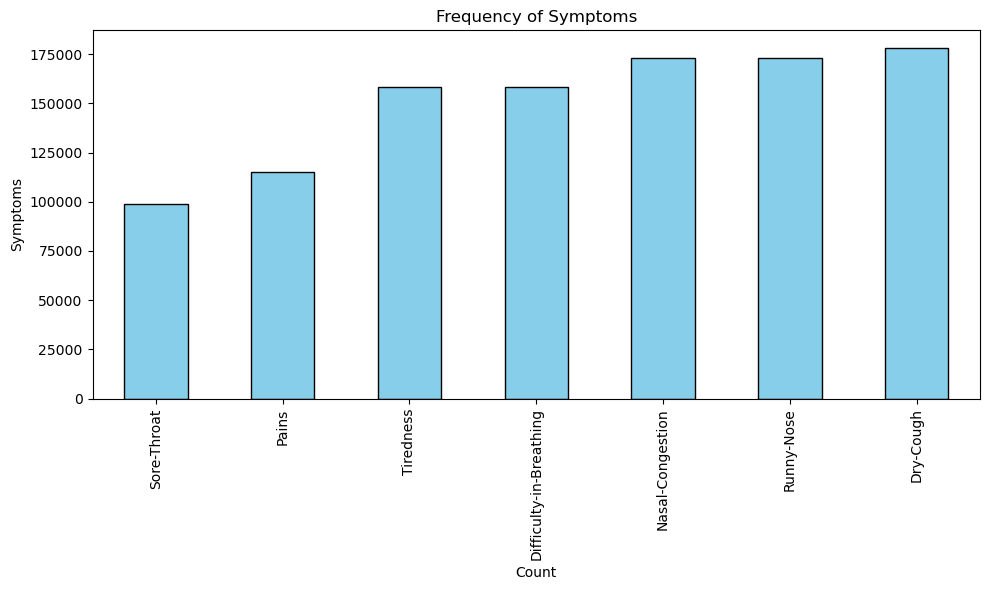

In [41]:
fig, ax = plt.subplots(figsize=(10, 6))

symptom_counts.sort_values().plot(kind='bar', ax=ax, color='skyblue', 
                                  edgecolor='black')
ax.set_title('Frequency of Symptoms')
ax.set_xlabel('Count')
ax.set_ylabel('Symptoms')

plt.tight_layout()
plt.show()

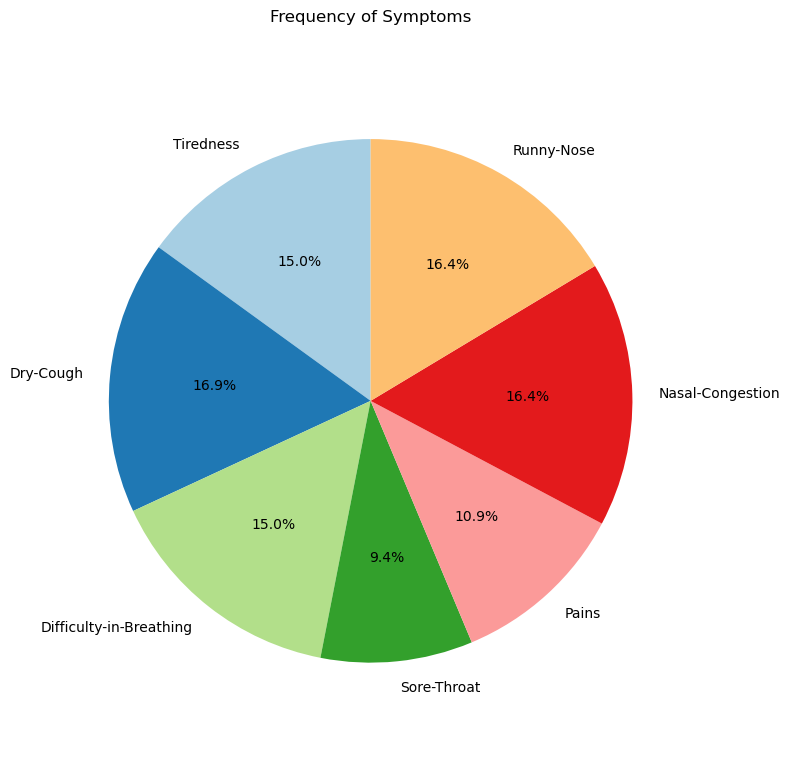

In [42]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(symptom_counts, labels=symptom_counts.index, autopct='%1.1f%%', 
       startangle=90,
       colors=plt.cm.Paired(range(len(symptom_counts))))
ax.set_title('Frequency of Symptoms')
plt.axis('equal')  
plt.tight_layout()
plt.show()

In [43]:
fig = px.bar(symptom_counts, x=symptom_counts.index, y=symptom_counts.values,
             labels={'x': 'Symptoms', 'y': 'Count'},
             title='Frequency of Symptoms', color_discrete_sequence=['skyblue'])
fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [44]:
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
fig = px.pie(symptom_counts, values=symptom_counts.values, names=symptom_counts.index,
             title='Frequency of Symptoms', color_discrete_sequence=custom_colors)
fig.show()

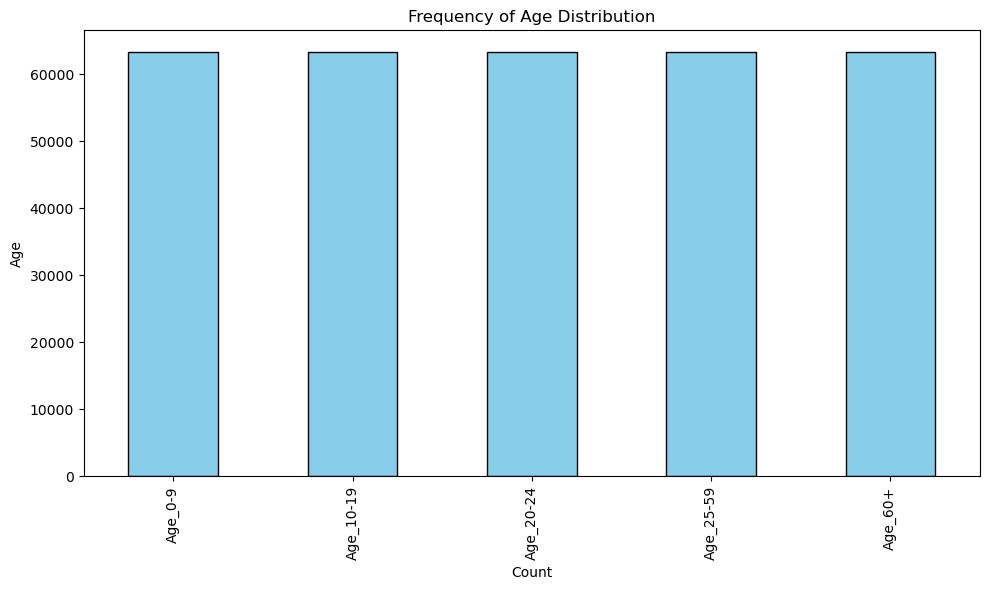

In [45]:
fig, ax = plt.subplots(figsize=(10, 6))

age_distribution.sort_values().plot(kind='bar', ax=ax, color='skyblue', 
                                  edgecolor='black')
ax.set_title('Frequency of Age Distribution')
ax.set_xlabel('Count')
ax.set_ylabel('Age')

plt.tight_layout()
plt.show()

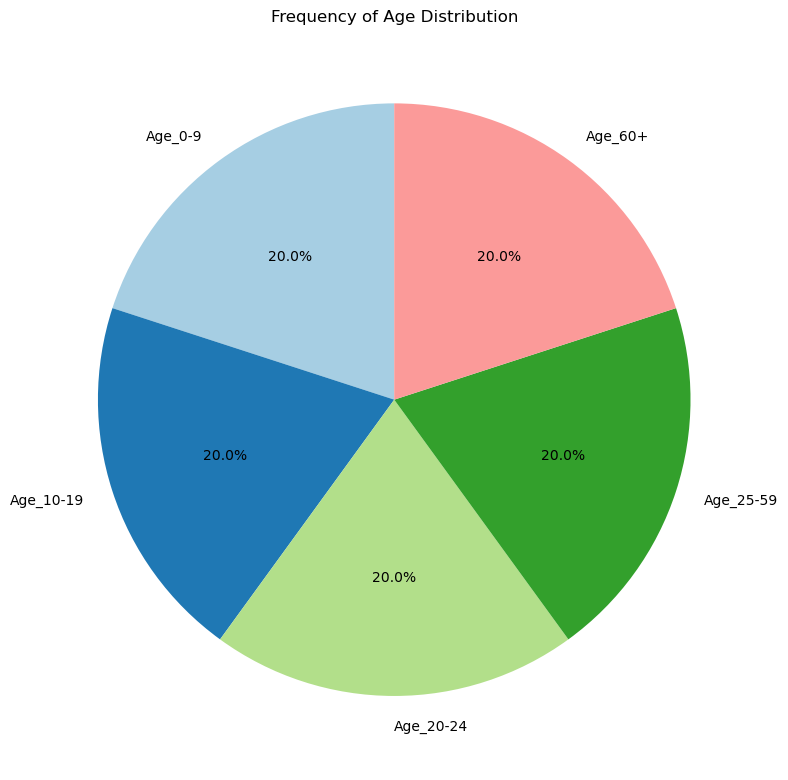

In [46]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(age_distribution, labels=age_distribution.index, autopct='%1.1f%%', 
       startangle=90,
       colors=plt.cm.Paired(range(len(age_distribution))))
ax.set_title('Frequency of Age Distribution')
plt.axis('equal')  
plt.tight_layout()
plt.show()

In [47]:
fig = px.bar(age_distribution, x=age_distribution.index, y=age_distribution.values,
             labels={'x': 'Age Distribution', 'y': 'Count'},
             title='Frequency of Age Distribution', color_discrete_sequence=['skyblue'])
fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [48]:
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
fig = px.pie(age_distribution, values=age_distribution.values, names=age_distribution.index,
             title='Frequency of Age Distribution', color_discrete_sequence=custom_colors)
fig.show()

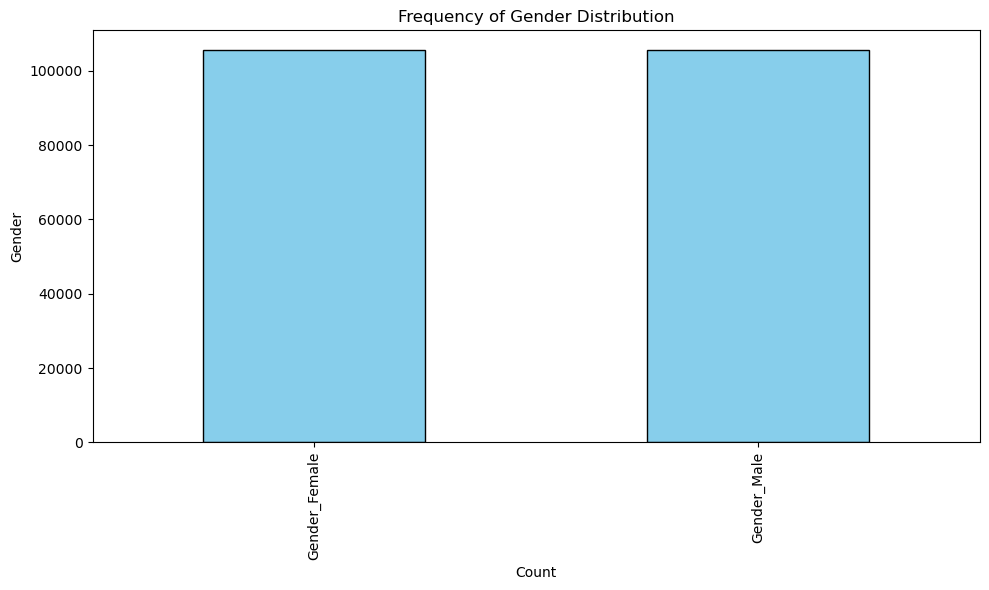

In [49]:
fig, ax = plt.subplots(figsize=(10, 6))

gender_distribution.sort_values().plot(kind='bar', ax=ax, color='skyblue', 
                                  edgecolor='black')
ax.set_title('Frequency of Gender Distribution')
ax.set_xlabel('Count')
ax.set_ylabel('Gender')

plt.tight_layout()
plt.show()

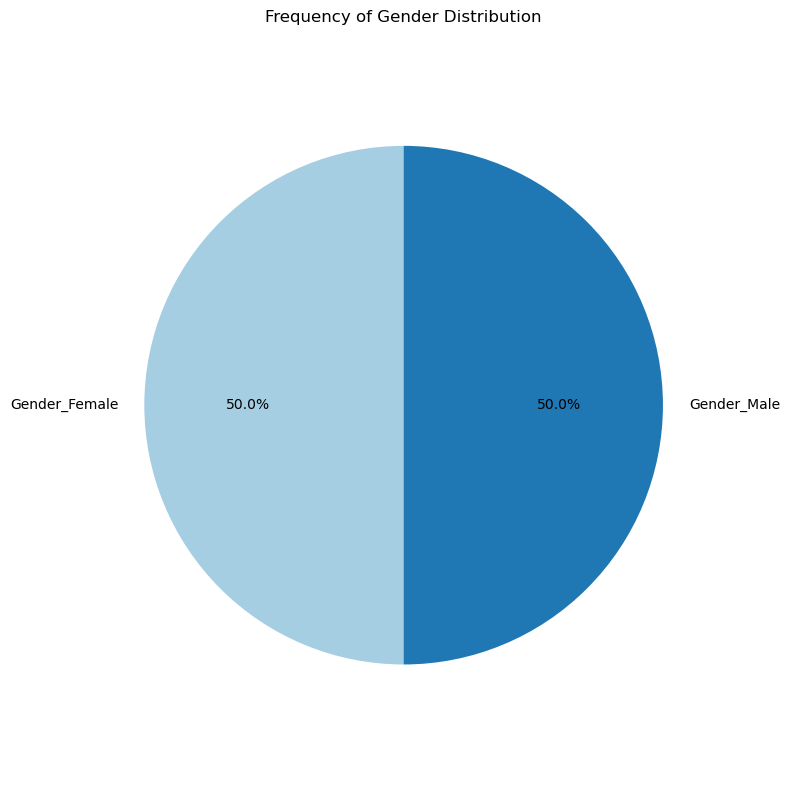

In [50]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', 
       startangle=90,
       colors=plt.cm.Paired(range(len(age_distribution))))
ax.set_title('Frequency of Gender Distribution')
plt.axis('equal')  
plt.tight_layout()
plt.show()

In [51]:
fig = px.bar(gender_distribution, x=gender_distribution.index, y=gender_distribution.values,
             labels={'x': 'Gender Distribution', 'y': 'Count'},
             title='Frequency of Gender Distribution', color_discrete_sequence=['skyblue'])
fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [52]:
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
fig = px.pie(gender_distribution, values=gender_distribution.values, names=gender_distribution.index,
             title='Frequency of Gender Distribution', color_discrete_sequence=custom_colors)
fig.show()

In [53]:
corr = df[symptoms].corr()

In [54]:
corr

Tiredness     Dry-Cough  Difficulty-in-Breathing  \
Tiredness                1.000000e+00  3.779645e-01             4.629153e-17   
Dry-Cough                3.779645e-01  1.000000e+00             3.779645e-01   
Difficulty-in-Breathing  4.629153e-17  3.779645e-01             1.000000e+00   
Sore-Throat             -1.348400e-01  5.096472e-02             4.045199e-01   
Pains                    2.612420e-17  4.519459e-18            -9.663757e-19   
Nasal-Congestion        -6.526807e-17 -5.180861e-17             1.076763e-17   
Runny-Nose              -1.561936e-16 -9.767619e-17            -1.091121e-17   

                          Sore-Throat         Pains  Nasal-Congestion  \
Tiredness               -1.348400e-01  2.612420e-17     -6.526807e-17   
Dry-Cough                5.096472e-02  4.519459e-18     -5.180861e-17   
Difficulty-in-Breathing  4.045199e-01 -9.663757e-19      1.076763e-17   
Sore-Throat              1.000000e+00 -1.063529e-17      3.705775e-17   
Pains                   -1.063529e-17  1.000000e+00      3.105295e-01   
Nasal-Congestion         3.705775e-17  3.105295e-01      1.000000e+00   
Runny-Nose               2.844633e-17 -6.900656e-02      2.666667e-01   

                           Runny-Nose  
Tiredness               -1.561936e-16  
Dry-Cough               -9.767619e-17  
Difficulty-in-Breathing -1.091121e-17  
Sore-Throat              2.844633e-17  
Pains                   -6.900656e-02  
Nasal-Congestion         2.666667e-01  
Runny-Nose               1.000000e+00

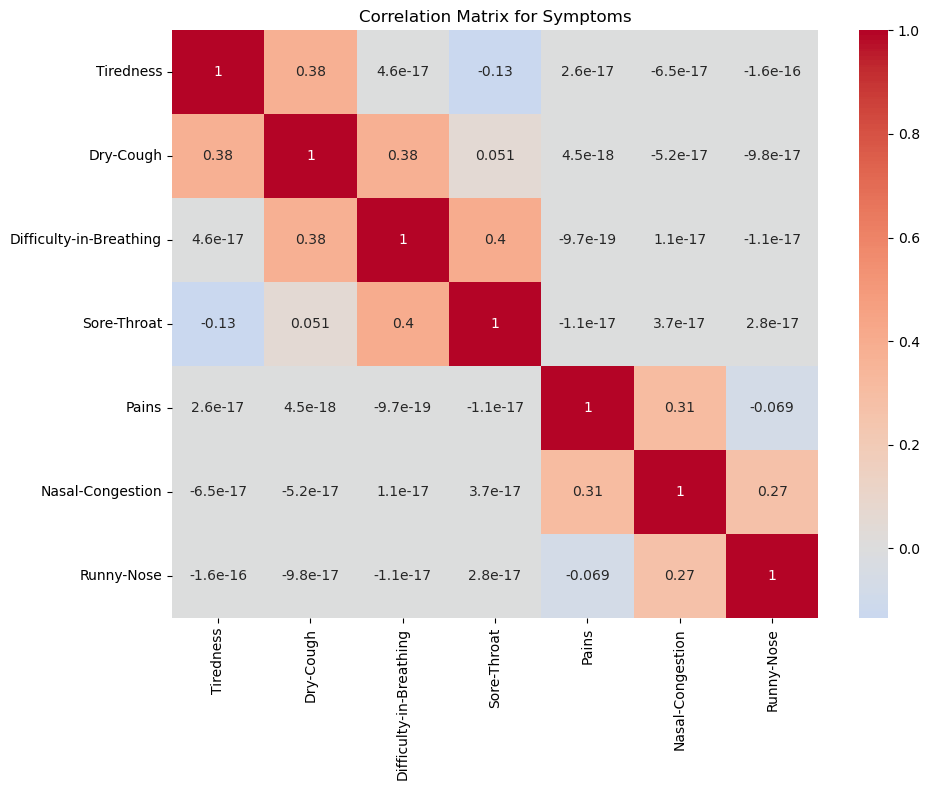

In [55]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, ax=ax)
ax.set_title('Correlation Matrix for Symptoms')
plt.tight_layout()
plt.show()

In [56]:
severity_symptom_means = df.groupby(by=[col for col in df.columns if "Asthma_Severity" in col])[symptoms].mean()

In [57]:
severity_symptom_means

Tiredness  Dry-Cough  Difficulty-in-Breathing  Sore-Throat  \
Asthma_Severity                                                               
0                      0.5     0.5625                      0.5       0.3125   
1                      0.5     0.5625                      0.5       0.3125   

                    Pains  Nasal-Congestion  Runny-Nose  
Asthma_Severity                                          
0                0.363636          0.545455    0.545455  
1                0.363636          0.545455    0.545455

In [58]:
severity_symptom_means = severity_symptom_means.transpose()

In [59]:
severity_symptom_means

Asthma_Severity                 0         1
Tiredness                0.500000  0.500000
Dry-Cough                0.562500  0.562500
Difficulty-in-Breathing  0.500000  0.500000
Sore-Throat              0.312500  0.312500
Pains                    0.363636  0.363636
Nasal-Congestion         0.545455  0.545455
Runny-Nose               0.545455  0.545455

In [60]:
data = {
    'Asthma_Severity': [0, 1, 2],
    'Tiredness': [0.500000, 0.500000, 0.500000],
    'Dry-Cough': [0.562500, 0.562500, 0.562500],
    'Difficulty-in-Breathing': [0.500000, 0.500000, 0.500000],
    'Sore-Throat': [0.312500, 0.312500, 0.312500],
    'Pains': [0.363636, 0.363636, 0.363636],
    'Nasal-Congestion': [0.545455, 0.545455, 0.545455],
    'Runny-Nose': [0.545455, 0.545455, 0.545455]
}

In [61]:
df1 = pd.DataFrame(data)

In [62]:
df1.set_index('Asthma_Severity', inplace=True)

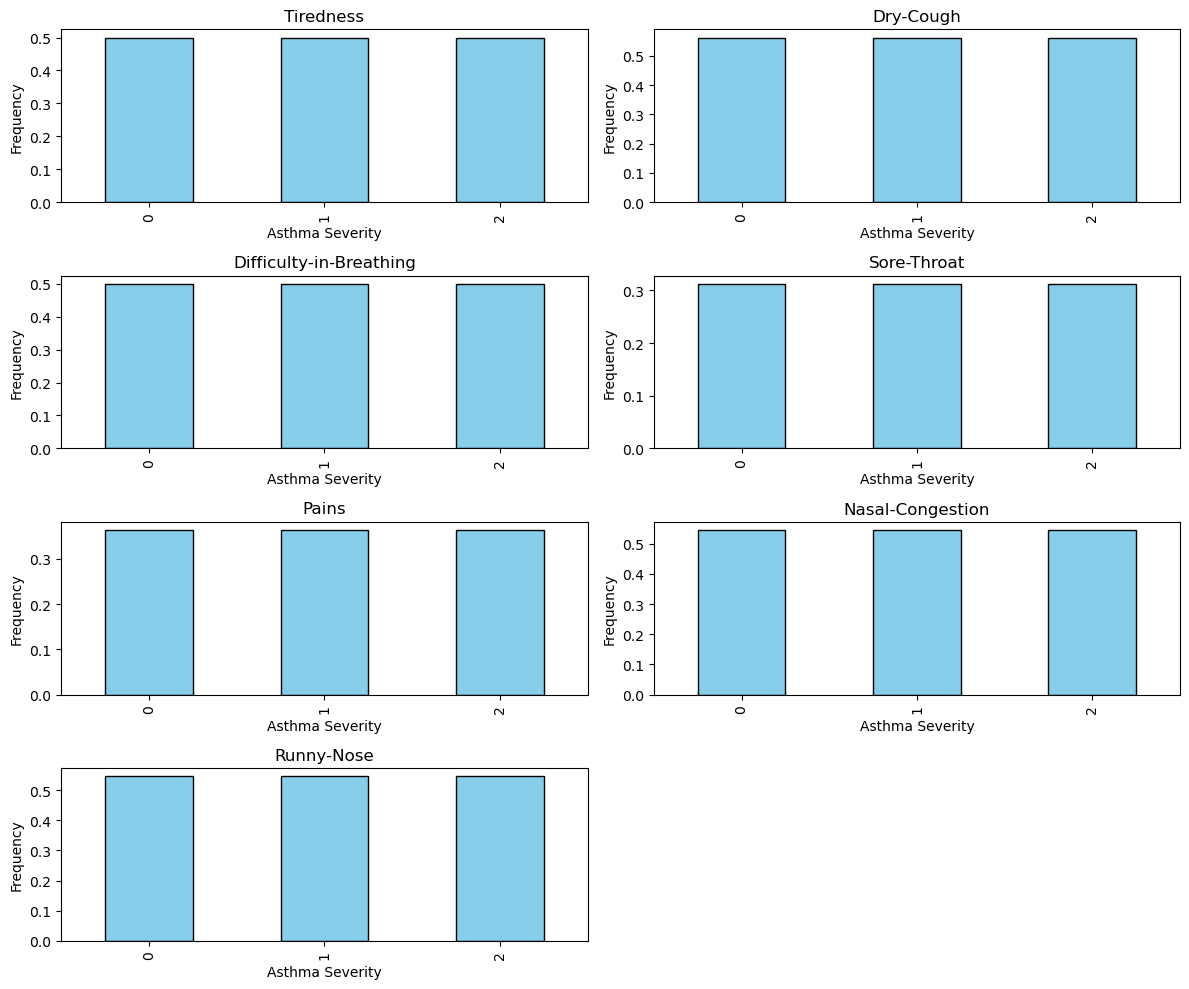

In [63]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 10))
symptoms = ['Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing', 'Sore-Throat', 'Pains', 'Nasal-Congestion', 'Runny-Nose']

for i, symptom in enumerate(symptoms):
    row, col = divmod(i, 2)
    df1[symptom].plot(kind='bar', ax=axes[row, col], color='skyblue', edgecolor='black')
    axes[row, col].set_title(symptom)
    axes[row, col].set_xlabel('Asthma Severity')
    axes[row, col].set_ylabel('Frequency')

if len(symptoms) < len(axes.flat):
    for i in range(len(symptoms), len(axes.flat)):
        fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

In [64]:
df

Tiredness  Dry-Cough  Difficulty-in-Breathing  Sore-Throat  \
0               1          1                        1            1   
1               1          1                        1            1   
2               1          1                        1            1   
3               1          1                        1            1   
4               1          1                        1            1   
...           ...        ...                      ...          ...   
316795          0          0                        0            0   
316796          0          0                        0            0   
316797          0          0                        0            0   
316798          0          0                        0            0   
316799          0          0                        0            0   

        None_Sympton  Pains  Nasal-Congestion  Runny-Nose  None_Experiencing  \
0                  0      1                 1           1                  0   
1                  0      1                 1           1                  0   
2                  0      1                 1           1                  0   
3                  0      1                 1           1                  0   
4                  0      1                 1           1                  0   
...              ...    ...               ...         ...                ...   
316795             1      0                 0           0                  1   
316796             1      0                 0           0                  1   
316797             1      0                 0           0                  1   
316798             1      0                 0           0                  1   
316799             1      0                 0           0                  1   

        Age_0-9  Age_10-19  Age_20-24  Age_25-59  Age_60+  Gender_Female  \
0             1          0          0          0        0              0   
1             1          0          0          0        0              0   
2             1          0          0          0        0              0   
3             1          0          0          0        0              0   
4             1          0          0          0        0              0   
...         ...        ...        ...        ...      ...            ...   
316795        0          0          0          0        1              0   
316796        0          0          0          0        1              0   
316797        0          0          0          0        1              0   
316798        0          0          0          0        1              0   
316799        0          0          0          0        1              0   

        Gender_Male  Asthma_Severity  
0                 1                0  
1                 1                0  
2                 1                0  
3                 1                1  
4                 1                1  
...             ...              ...  
316795            0                0  
316796            0                0  
316797            0                0  
316798            0                0  
316799            0                0  

[316800 rows x 17 columns]

In [65]:
X = df.drop(['Asthma_Severity'], axis = 1)
y = df['Asthma_Severity']

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [68]:
clf.fit(X, y)

RandomForestClassifier(random_state=42)

In [69]:
feature_importances = clf.feature_importances_

In [70]:
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

In [71]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

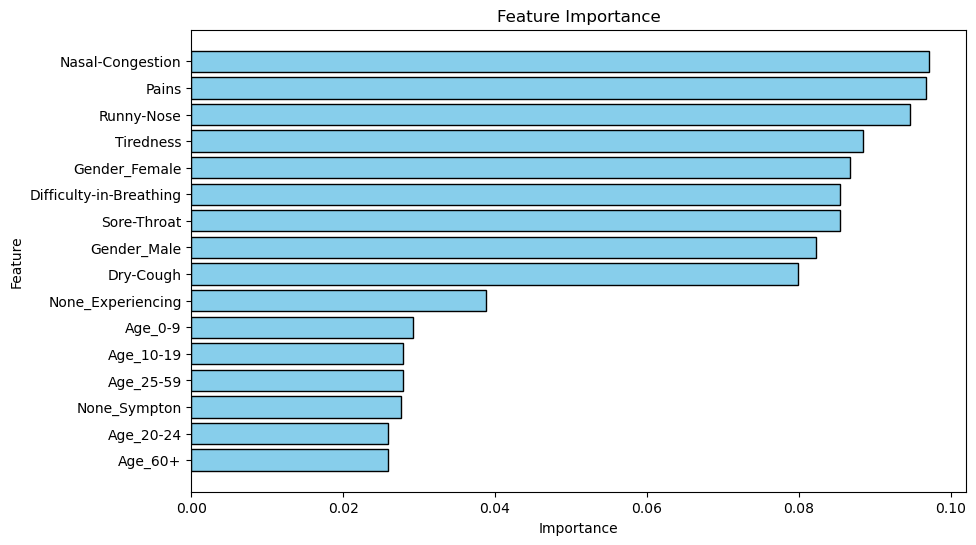

In [72]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue', edgecolor='black')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  

In [73]:
X = df[symptoms + gender_groups]

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [75]:
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2,
                                               stratify = y, 
                                               random_state=42)

In [76]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [77]:
lr = LogisticRegression(random_state=42)

In [78]:
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [79]:
y_pred_lr = lr.predict(X_test)

In [80]:
accuracy = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.75


In [81]:
dt = DecisionTreeClassifier()

In [94]:
model_dt = dt.fit(X_train, y_train)

In [83]:
y_pred_dt = model_dt.predict(X_test)

In [84]:
accuracy = accuracy_score(y_test, y_pred_dt) 
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.75


In [88]:
# pip install xgboost

In [89]:
import xgboost as xgb

In [90]:
clf = xgb.XGBClassifier(
    objective='multi:softmax',  
    num_class=len(pd.unique(y)),  
    eval_metric='mlogloss',      
    use_label_encoder=False     
)

In [91]:
clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=2, num_parallel_tree=None, ...)

In [92]:
y_pred_xgb = clf.predict(X_test)

In [93]:
accuracy = accuracy_score(y_test, y_pred_xgb) 
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.75


1.LogisticRegression >> Accuracy >>75%
2.DecisionTreeClassifier >> Accuracy >>75%
3.XGBClassifier >> Accuracy >>75%

In [97]:
# pip install zipfile

In [102]:
import zipfile
file_to_compress = 'Asthama_Predict_ML.ipynb'
compressed_file = 'Asthama_Predict_ML_Comp.zip'
with zipfile.ZipFile(compressed_file, 'w', zipfile.ZIP_DEFLATED) as zipf:
    zipf.write(file_to_compress, arcname='y.ipynb')
print(f'{file_to_compress} has been compressed to {compressed_file}')

Asthama_Predict_ML.ipynb has been compressed to Asthama_Predict_ML_Comp.zip
